# Project Title: Deploying a Machine Learning Model as a REST API with Real-Time Streaming

## 🧠 Project Introduction: Real-Time Fraud Detection Deployment

---

### ❓ What is the Problem?
1. A trained fraud detection model exists, but it only runs in isolated, offline environments (e.g., Jupyter notebooks).
2. There's no real-time mechanism to serve predictions to the transaction processing system.
3. Fraudulent transactions may go undetected or be flagged too late due to a lack of live inference.

---

#### 🤔 Why Does the Problem Exist?
1. The current model is not productionized — it’s not served through an API.
2. There’s no real-time stream processor to handle incoming transactions and feed them to the model.
3. The architecture lacks containerization, making deployment across environments inconsistent.
4. There’s no system for batch or streaming predictions — only manual, static inputs.
5. Business teams don’t have actionable fraud data in real time, limiting their response speed.

---

#### 👥 Who Has This Problem?
- **Fintech companies** processing thousands of transactions per minute  
- **Data science teams** who can build models but lack deployment expertise  
- **Security and compliance teams** needing rapid fraud insights  
- **Customers** whose transactions may be delayed or misclassified without real-time detection  

---

### ✅ The Solution

#### 💡 What?
Deploy the trained fraud detection model as a **FastAPI REST API**, containerize it with **Docker**, and stream real-time transaction data using **Kafka** to serve predictions live.

---

#### 🔍 Why?
- REST APIs allow easy integration into live systems via HTTP.  
- Kafka enables ingestion and processing of **real-time data** with low latency.  
- Docker ensures the service is **portable, scalable, and reproducible** across environments.

---

#### ⚙️ How?
1. Serve the model using **FastAPI** with a `/predict` endpoint.
2. Use **Kafka Producer** to stream transaction data.
3. Connect a **Kafka Consumer** that feeds data to the API and logs or acts on the prediction.
4. Containerize the entire setup using **Docker** for local and cloud deployment.

---

#### 🌍 Vision
To create a scalable and production-ready system that empowers fintech platforms to detect and act on fraudulent activity **in real time**, reducing financial risk and increasing customer trust.

---

### 💥 The Benefits

#### 📌 What?
- Real-time fraud predictions integrated into transaction pipelines  
- Automated detection process reduces manual review effort  
- Modular, reusable infrastructure for future ML models  

---

#### 📈 Why?
- Faster detection → faster reaction → less financial exposure  
- Consistency across environments through containerization  
- Clear path from model development to production deployment  

---

#### 🧩 How?
- Leverage open-source tools like **FastAPI**, **Kafka**, and **Docker**  
- Use streaming architecture to simulate real-world behavior  
- Build a system designed to scale as the company grows  

---

## Step 1: 

### 🧾 Setting Up the Environment

---

#### 🎯 Purpose of This Step
Before we can build our fraud detection system, we need to make sure everything is ready behind the scenes. Think of this as setting the stage so all our tools (model, API, live streaming) work together smoothly.

We’ll:
- Prepare a workspace for building and testing
- Install the necessary tools
- Start a mini system (called Kafka) to help our app handle **real-time data**

---

#### 🧠 What You'll Be Using
| Tool | What It Does | Why We Need It |
|------|--------------|----------------|
| **Python** | Programming language | Main language we use to build the app |
| **FastAPI** | Web API framework | Helps us talk to the model over the internet |
| **Docker** | Container tool | Lets us “package” the app to run anywhere |
| **Kafka** | Streaming platform | Helps us handle transactions as they happen |
| **Pandas/Scikit-learn** | Data science tools | For building and testing the fraud model |

---

##### ⚙️ 1. Set Up Your Python Environment

This creates a safe space where we install only what we need.

```sql
🔧 Commands (Run these in Terminal)
```

##### 📦 2. Install Required Python Libraries

This step brings in the packages we need for machine learning, APIs, and data streaming.

```sql
📥 Installation Commands
```

##### 🐳 3. Install Docker (if you haven’t already)
Docker lets us package the app so it works exactly the same on any machine or server.

##### 👥 4. Add Yourself to the Docker Group (Optional)
So you don’t need to type sudo every time you use Docker.

##### 🛰️ 5. Start Kafka Locally with Docker
Kafka helps us stream data in real-time. We'll use Docker to run it with a few lines of config.

##### ✅ Step Completion Checklist
- Python environment set up and activated

- Required libraries installed

- Docker installed and working

- Kafka up and running using Docker Compose

In [1]:
# ================================
# 📦 Install Required Libraries
# ================================

# Uncomment and run if any package is missing
# !pip install fastapi uvicorn scikit-learn pandas numpy kafka-python joblib tqdm rich
# !pip install xgboost lightgbm catboost
# !pip install matplotlib seaborn plotly scikit-plot
# !pip install tensorflow torch keras  # Deep learning libraries (not used here)

# ================================
# 🧠 Core Libraries
# ================================

import numpy as np
import pandas as pd
import joblib
import json

# ================================
# 📁 File and OS Management
# ================================

import os
from pathlib import Path

# ================================
# 🪵 Logging and Progress Tracking
# ================================

from tqdm import tqdm
from rich import print as rprint

# ================================
# 🔧 Extra Utilities
# ================================

import time
import random
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ================================
# 📊 Visualization Libraries
# ================================

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ================================
# 🤖 Machine Learning Models (Top 5 for Tabular Data)
# ================================

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ================================
# 🧬 Deep Learning Models (Not Used in This Project)
# ================================

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import torch
# import torch.nn as nn

# ================================
# 🧪 Miscellaneous
# ================================

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, classification_report
)
import socket

## Step 2:

### 🧠 Step 2: Building the Machine Learning Model

---

#### 🎯 Purpose of This Step
In this step, we teach the computer how to recognize patterns in **fraudulent** transactions.

We'll train a model (a type of computer program that learns from data) using real-world transaction data so it can later predict whether a new transaction might be fraudulent or not.

Even though we could use a pre-trained model, building one from scratch helps us:
- Understand how the model behaves
- Customize it to our needs
- Make improvements later

---

#### 📊 Dataset: Credit Card Transactions

We use a public dataset with **real anonymized** credit card transactions.  
Each row is one transaction, with:
- Various anonymized features (V1 to V28)
- Amount of the transaction
- `Class` (0 = Not Fraud, 1 = Fraud)

📦 Download the dataset:  
https://www.kaggle.com/mlg-ulb/creditcardfraud

---

##### 🪛 1. Load and Check the Data

We begin by safely loading the CSV file into Python and making sure:
- It’s not empty or broken
- It has the expected columns
- It’s ready to be analyzed

##### 🔍 2. Explore and Visualize the Data
We'll check for:
- Missing values
- Duplicates
- How many frauds vs. non-frauds exist
- What the data looks like visually

We then plot:

- Class distribution
- Amounts over time
- Feature correlations

##### 🤖 3. Train the Model (Logistic Regression)
We’ll use a popular algorithm called LightGBM — effective and interpretable.

Before training:

- We split the data into training and testing

- We balance class weights to help the model learn from the small number of fraud cases

##### 💾 4. Save the Trained Model
Once trained, we save the model to a file so we can reuse it later in our API.

##### ✅ Step Completion Checklist

- Dataset loaded and validated

- Visualizations created

- Model trained and tested

- Model saved for API integration


In [2]:
def load_creditcard_dataset(file_path: str) -> pd.DataFrame:
    """
    Safely loads the credit card fraud detection dataset.
    
    Parameters:
        file_path (str): Full path to the creditcard.csv file

    Returns:
        pd.DataFrame: Loaded dataset if successful
    
    Raises:
        FileNotFoundError: If the file does not exist
        ValueError: If the file is not a CSV or is empty/corrupted
        Exception: For any other unforeseen errors
    """

    try:
        # Validate file existence
        if not os.path.isfile(file_path):
            raise FileNotFoundError(f"❌ File not found at path: {file_path}")

        if not file_path.endswith(".csv"):
            raise ValueError("❌ File must be a .csv file.")

        # Use efficient loading for large datasets
        rprint("[cyan]🔄 Loading dataset...[/cyan]")
        df = pd.read_csv(file_path)

        # Validate structure
        if df.empty:
            raise ValueError("⚠️ Loaded dataset is empty.")
        
        expected_cols = {"Time", "Amount", "Class"}
        if not expected_cols.issubset(df.columns):
            raise ValueError(f"🧩 Missing expected columns: {expected_cols - set(df.columns)}")

        rprint(f"[green]✅ Dataset loaded successfully with shape: {df.shape}[/green]")
        return df

    except FileNotFoundError as fnf_error:
        rprint(f"[bold red]{fnf_error}[/bold red]")
        raise

    except pd.errors.ParserError as pe:
        rprint("[bold red]❌ Failed to parse CSV. Is the file corrupted?[/bold red]")
        raise pe

    except ValueError as ve:
        rprint(f"[bold red]{ve}[/bold red]")
        raise

    except Exception as e:
        rprint(f"[bold red]⚠️ An unexpected error occurred: {str(e)}[/bold red]")
        raise


# ================================
# 🧪 Test the Loader
# ================================

# Update this path to the actual location in your system
csv_path = "Dataset/creditcard.csv"

try:
    df_credit = load_creditcard_dataset(csv_path)
except Exception as e:
    rprint("[bold red]❌ Data loading failed. Fix the issue above before proceeding.[/bold red]")

def run_eda(df: pd.DataFrame) -> dict:
    """
    Runs basic exploratory data analysis and prints summary.
    
    Parameters:
        df (pd.DataFrame): The dataset to explore
    
    Returns:
        dict: A dictionary with key EDA outputs for further analysis or logging
    """
    try:
        rprint("[cyan]🔍 Running EDA...[/cyan]")

        summary = {
            "shape": df.shape,
            "columns": df.columns.tolist(),
            "nulls": df.isnull().sum().to_dict(),
            "dtypes": df.dtypes.astype(str).to_dict(),
            "duplicates": df.duplicated().sum(),
            "target_distribution": df['Class'].value_counts(normalize=True).to_dict(),
            "cardinality": {col: df[col].nunique() for col in df.columns}
        }

        rprint(f"[green]✅ Dataset contains {summary['shape'][0]} rows and {summary['shape'][1]} columns[/green]")
        rprint(f"[yellow]⚠️ Duplicate rows: {summary['duplicates']}[/yellow]")
        rprint(f"[magenta]📊 Target Distribution: {summary['target_distribution']}[/magenta]")

        return summary

    except Exception as e:
        rprint(f"[bold red]EDA failed: {e}[/bold red]")
        raise

def visualize_data(df: pd.DataFrame, sample_size: int = 10000):
    """
    Produces efficient visualizations for understanding fraud patterns.
    
    Parameters:
        df (pd.DataFrame): Cleaned dataset
        sample_size (int): Max number of rows to use for visualizations to reduce processing time
    """
    try:
        rprint("[cyan]📉 Generating Visualizations (Optimized)...[/cyan]")

        # --- 1. Class Distribution (Unchanged) ---
        plt.figure(figsize=(6, 4))
        sns.countplot(x='Class', data=df)
        plt.title("Fraud vs Non-Fraud Transactions")
        plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
        plt.ylabel("Count")
        plt.show()

        # --- 2. Amount Over Time (Downsampled) ---
        rprint("[yellow]⚠️ Sampling for time-series plot...[/yellow]")
        fraud = df[df['Class'] == 1]
        non_fraud_sample = df[df['Class'] == 0].sample(n=sample_size, random_state=42)
        df_sampled = pd.concat([fraud, non_fraud_sample]).sort_values('Time')

        plt.figure(figsize=(10, 5))
        sns.lineplot(data=df_sampled, x='Time', y='Amount', hue='Class', alpha=0.7, palette='Set1')
        plt.title("Transaction Amount Over Time (Sampled)")
        plt.xlabel("Time")
        plt.ylabel("Amount")
        plt.show()

        # --- 3. Correlation Heatmap (Feature subset) ---
        rprint("[yellow]⚠️ Limiting features for correlation heatmap...[/yellow]")
        features_subset = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 11)] + ['Class']
        corr = df[features_subset].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.3)
        plt.title("Feature Correlation Heatmap (Subset)")
        plt.show()

        rprint("[green]✅ Visualizations completed successfully.[/green]")

    except Exception as e:
        rprint(f"[bold red]Visualization failed: {e}[/bold red]")
        raise

def train_and_compare_models(df: pd.DataFrame, test_size=0.2, random_state=42):
    """
    Trains multiple ML models with class imbalance handling and compares their performance.

    Parameters:
        df (pd.DataFrame): Preprocessed dataset with features and 'Class' as target
        test_size (float): Fraction of data to reserve for testing
        random_state (int): Seed for reproducibility

    Returns:
        best_model (fitted model): The top-performing model by F1-Score
        all_metrics (dict): Evaluation metrics for all models
    """
    try:
        rprint("[cyan]⚙️ Training models with class imbalance handling...[/cyan]")

        X = df.drop(columns=['Class'])
        y = df['Class']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=random_state
        )

        models = {
            "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
            "RandomForest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=random_state),
            "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=random_state),
            "XGBoost": XGBClassifier(scale_pos_weight=1 / 0.0017, use_label_encoder=False, eval_metric='logloss', random_state=random_state),
            "LightGBM": LGBMClassifier(class_weight='balanced', random_state=random_state)
        }

        all_metrics = {}
        best_model = None
        best_f1 = 0

        for name, model in models.items():
            rprint(f"[blue]🔄 Training {name}...[/blue]")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            metrics = {
                "accuracy": accuracy_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred, zero_division=0),
                "recall": recall_score(y_test, y_pred, zero_division=0),
                "f1_score": f1_score(y_test, y_pred, zero_division=0)
            }

            all_metrics[name] = metrics

            if metrics["f1_score"] > best_f1:
                best_model = model
                best_f1 = metrics["f1_score"]

            rprint(f"[green]{name} F1 Score: {metrics['f1_score']:.4f}[/green]")

        rprint("[bold green]🏁 All models trained and evaluated successfully.[/bold green]")
        return best_model, all_metrics

    except Exception as e:
        rprint(f"[bold red]Model training failed: {e}[/bold red]")
        raise

🔄 Loading dataset...

✅ Dataset loaded successfully with shape: (284807, 31)

🔍 Running EDA...

✅ Dataset contains 284807 rows and 31 columns

⚠️ Duplicate rows: 1081

📊 Target Distribution: {0: 0.9982725143693799, 1: 0.001727485630620034}

📉 Generating Visualizations (Optimized)...

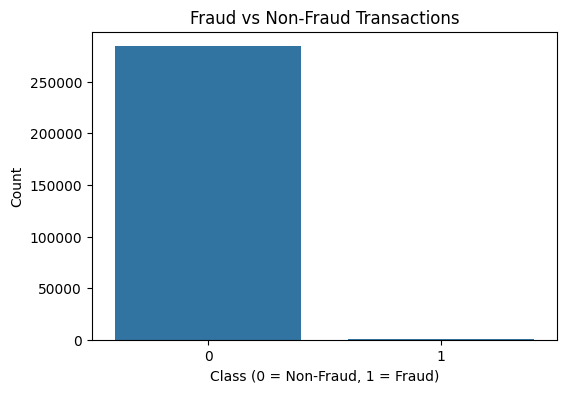

⚠️ Sampling for time-series plot...

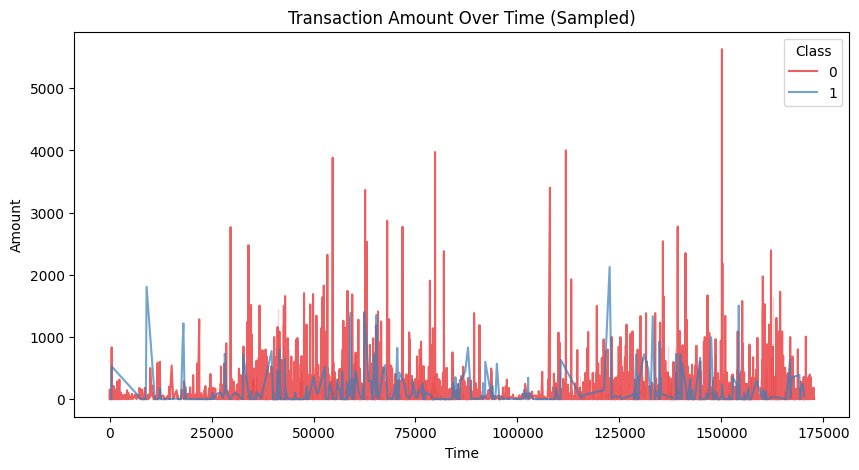

⚠️ Limiting features for correlation heatmap...

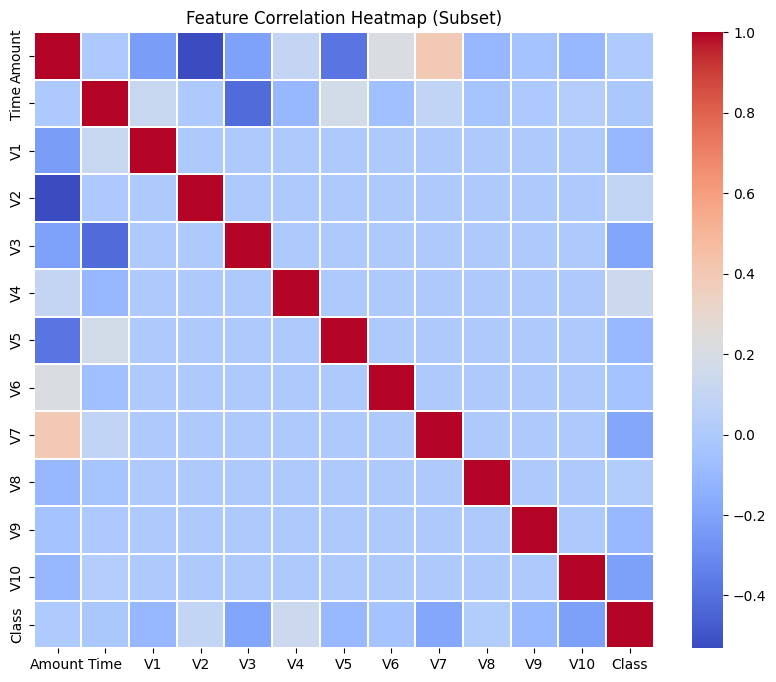

✅ Visualizations completed successfully.

⚙️ Training models with class imbalance handling...

🔄 Training LogisticRegression...

LogisticRegression F1 Score: 0.0826

🔄 Training RandomForest...

RandomForest F1 Score: 0.8391

🔄 Training GradientBoosting...

GradientBoosting F1 Score: 0.2727

🔄 Training XGBoost...

XGBoost F1 Score: 0.8586

🔄 Training LightGBM...

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LightGBM F1 Score: 0.8416

🏁 All models trained and evaluated successfully.

LogisticRegression: accuracy: 0.9649, precision: 0.0432, recall: 0.9184, f1_score: 0.0826

RandomForest: accuracy: 0.9995, precision: 0.9605, recall: 0.7449, f1_score: 0.8391

GradientBoosting: accuracy: 0.9983, precision: 0.5294, recall: 0.1837, f1_score: 0.2727

XGBoost: accuracy: 0.9995, precision: 0.8817, recall: 0.8367, f1_score: 0.8586

LightGBM: accuracy: 0.9994, precision: 0.8173, recall: 0.8673, f1_score: 0.8416

In [3]:
run_eda(df_credit)
visualize_data(df_credit, sample_size=8000)
best_model, model_scores = train_and_compare_models(df_credit)

# Optional: Print all results
for name, metrics in model_scores.items():
    rprint(f"[bold]{name}[/bold]: " + ", ".join([f"{k}: {v:.4f}" for k, v in metrics.items()]))

In [4]:
# Save the best model for deployment
from joblib import dump

output_dir = Path("artifacts/models")
output_dir.mkdir(parents=True, exist_ok=True)

model_path = output_dir / "lightgbm_fraud_model.pkl"
dump(best_model, model_path)

rprint(f"[bold green]✅ Model saved to: {model_path}[/bold green]")

✅ Model saved to: artifacts/models/lightgbm_fraud_model.pkl

## Step 3: 

### 🚀 Step 3: Creating the REST API with FastAPI

---

#### 🎯 Purpose of This Step
Now that we’ve trained a model to detect fraud, we need a simple and secure way to **use it**.

This step builds a **REST API** – a type of web service – that receives transaction data and returns whether it's **fraudulent or not**.

Think of it like a digital fraud-checking assistant. You send it a transaction, and it quickly tells you if you should be worried. ⚠️

---

#### 🛠️ Tools We Use

- **FastAPI**: A modern Python web framework for building APIs.
- **Uvicorn**: A lightweight server to run the API.
- **Pydantic**: Ensures input data is clean and well-structured.
- **Joblib**: Loads our previously trained model.

---

##### 📦 1. Define What the API Accepts (Input Model)

We use **Pydantic** to define the expected transaction fields.

Each transaction includes:
- 28 anonymized feature values (`V1` to `V28`)
- A timestamp (`Time`)
- The amount spent (`Amount`)


##### ⚙️ 2. Build the FastAPI App
We create a small web app with:

A / root route for health-checks

A /predict route to make predictions

##### 🧪 3. Test the API (Locally)
To run the API locally, we use Uvicorn:


✅ Step Completion Checklist
- API initialized with FastAPI
- predict route accepts JSON and returns prediction
- Trained model successfully loaded into API
- API tested locally via Swagger UI

In [3]:
# ================================
# 🚀 FastAPI Setup for Fraud Detection API (Notebook-Friendly)
# ================================

from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import joblib
import uvicorn
import nest_asyncio
import threading

# -------------------------------
# 🧠 Pydantic Model for Input Validation
# -------------------------------

class TransactionInput(BaseModel):
    V1: float
    V2: float
    V3: float
    V4: float
    V5: float
    V6: float
    V7: float
    V8: float
    V9: float
    V10: float
    V11: float
    V12: float
    V13: float
    V14: float
    V15: float
    V16: float
    V17: float
    V18: float
    V19: float
    V20: float
    V21: float
    V22: float
    V23: float
    V24: float
    V25: float
    V26: float
    V27: float
    V28: float
    Time: float
    Amount: float

# -------------------------------
# 🚀 FastAPI App Initialization
# -------------------------------

app = FastAPI(title="🛡️ Fraud Detection API")

# Load the model (assumes you've saved LightGBM model already)
model_path = "artifacts/models/lightgbm_fraud_model.pkl"
model = joblib.load(model_path)

@app.get("/")
def root():
    return {"message": "✅ Fraud Detection API is Live!"}

@app.post("/predict")
def predict(transaction: TransactionInput):
    try:
        features = np.array([list(transaction.dict().values())])
        pred = model.predict(features)[0]
        return {
            "prediction": int(pred),
            "label": "Fraud" if pred == 1 else "Not Fraud"
        }
    except Exception as e:
        return {"error": str(e)}


In [4]:
# ✅ Allow running Uvicorn in notebook
nest_asyncio.apply()

def start_api():
    uvicorn.run(app, host="0.0.0.0", port=8000)

# 🚀 Run API in background thread
api_thread = threading.Thread(target=start_api, daemon=True)
api_thread.start()

INFO:     Started server process [40888]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


## Step 4:

In [5]:
# ================================
# 📄 Generate requirements.txt dynamically
# ================================
reqs = """
fastapi
uvicorn
scikit-learn
joblib
numpy
pandas
kafka-python
"""
Path("requirements.txt").write_text(reqs.strip())
print("✅ requirements.txt created.")

✅ requirements.txt created.


In [8]:
# ================================
# 🐳 Write Dockerfile for FastAPI Fraud API
# ================================

dockerfile_content = '''
# ---- Base Python Image ----
FROM python:3.9-slim

# ---- Working Directory ----
WORKDIR /app

# ---- Install Dependencies ----
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# ---- Copy Code and Model ----
COPY . .

# ---- Expose FastAPI Port ----
EXPOSE 8000

# ---- Run the API ----
CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "8000"]
'''

Path("Dockerfile").write_text(dockerfile_content.strip())
print("✅ Dockerfile created.")


✅ Dockerfile created.


In [20]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import joblib
from kafka import KafkaConsumer, KafkaProducer
import json
import threading

# ================================
# 🔁 Kafka Prediction Thread
# ================================

def start_prediction_consumer(model, in_topic="transactions", out_topic="predictions"):
    consumer = KafkaConsumer(
        in_topic,
        bootstrap_servers='localhost:9092',
        group_id="fraud-detector",
        value_deserializer=lambda m: json.loads(m.decode('utf-8')),
        auto_offset_reset="latest"
    )

    producer = KafkaProducer(
        bootstrap_servers='localhost:9092',
        value_serializer=lambda v: json.dumps(v).encode('utf-8')
    )

    for msg in consumer:
        tx = msg.value
        features = np.array([list(tx.values())])
        prediction = int(model.predict(features)[0])
        result = {"input": tx, "prediction": prediction}
        producer.send(out_topic, result)
        print(f"🔍 Kafka Prediction: {result}")

# ================================
# 🧾 FastAPI REST Setup
# ================================

class TransactionInput(BaseModel):
    V1: float; V2: float; V3: float; V4: float; V5: float; V6: float
    V7: float; V8: float; V9: float; V10: float; V11: float; V12: float
    V13: float; V14: float; V15: float; V16: float; V17: float; V18: float
    V19: float; V20: float; V21: float; V22: float; V23: float; V24: float
    V25: float; V26: float; V27: float; V28: float
    Time: float
    Amount: float

app = FastAPI(title="🛡️ Fraud Detection API")

# Load model on startup
model = joblib.load("artifacts/models/lightgbm_fraud_model.pkl")

# Start Kafka listener in background thread
@app.on_event("startup")
def kafka_listener():
    thread = threading.Thread(target=start_prediction_consumer, args=(model,), daemon=True)
    thread.start()

@app.get("/")
def root():
    return {"message": "✅ Fraud Detection API is Live!"}

@app.post("/predict")
def predict(transaction: TransactionInput):
    features = np.array([list(transaction.dict().values())])
    pred = model.predict(features)[0]
    return {"prediction": int(pred), "label": "Fraud" if pred == 1 else "Not Fraud"}

from pathlib import Path

fastapi_code = '''<PASTE ABOVE UPDATED CODE HERE>'''

Path("main.py").write_text(fastapi_code.strip())
print("✅ Updated `main.py` with real-time Kafka integration.")

✅ Updated `main.py` with real-time Kafka integration.


In [5]:
import os
import getpass
from IPython.display import Markdown

# Get the current username
username = getpass.getuser()

# Check if user is in docker group
group_check_cmd = f"groups {username}"
group_check_result = os.popen(group_check_cmd).read()

if "docker" in group_check_result:
    display(Markdown(f"✅ **User `{username}` is already in the `docker` group.**"))
else:
    display(Markdown(f"⚠️ **User `{username}` is NOT in the `docker` group.**"))
    display(Markdown("To fix this, run the following cell to add the user to the Docker group:"))

    # Show the exact command as Markdown
    fix_cmd = f"sudo usermod -aG docker {username}"
    display(Markdown(f"```bash\n{fix_cmd}\n```"))
    display(Markdown("Then **restart your terminal or notebook runtime** for the changes to take effect."))

    # Optionally: write it into a shell script to be run manually
    with open("add_to_docker_group.sh", "w") as f:
        f.write("#!/bin/bash\n")
        f.write(f"sudo usermod -aG docker {username}\n")
        f.write("echo '✅ User added to docker group. Please log out and log back in.'\n")

    os.chmod("add_to_docker_group.sh", 0o755)
    display(Markdown("📦 A helper script was saved as `add_to_docker_group.sh`. You can run it manually."))

✅ **User `silver` is already in the `docker` group.**

In [6]:
import os
import subprocess
import getpass

def is_user_in_docker_group():
    """Check if the current user belongs to the docker group."""
    try:
        groups = subprocess.check_output(["groups"], text=True)
        return "docker" in groups
    except Exception as e:
        print(f"⚠️ Error checking group membership: {e}")
        return False

def add_user_to_docker_group():
    """Add the current user to the docker group using sudo."""
    user = os.environ.get("USER") or subprocess.getoutput("whoami")
    password = getpass.getpass("🔐 Enter your sudo password to modify group: ")

    try:
        # Append user to docker group
        proc = subprocess.run(
            ["sudo", "-S", "usermod", "-aG", "docker", user],
            input=password + "\n",
            text=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE
        )

        if proc.returncode == 0:
            print(f"✅ User '{user}' added to docker group successfully.")
            print("🔁 Please log out and log back in or run 'newgrp docker' to apply changes.")
        else:
            print(f"❌ Failed to add user: {proc.stderr}")
    except Exception as e:
        print(f"⚠️ Exception: {e}")

# =================================
# 🔍 Run the check + action
# =================================
if is_user_in_docker_group():
    print("✅ User is already in the 'docker' group.")
else:
    print("👤 User not in 'docker' group. Attempting to add...")
    add_user_to_docker_group()

✅ User is already in the 'docker' group.


In [7]:
import subprocess
import getpass
import os
import time

def run_command(command, sudo=False):
    """Run shell command with optional sudo."""
    if sudo:
        command.insert(0, "sudo")
    try:
        subprocess.run(command, check=True)
        return True
    except subprocess.CalledProcessError as e:
        print(f"❌ Command failed: {' '.join(command)}")
        return False

def is_docker_running():
    """Check if the Docker daemon is running."""
    try:
        subprocess.run(["docker", "info"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL, check=True)
        return True
    except subprocess.CalledProcessError:
        return False

def start_docker():
    """Try to start Docker if not already running."""
    if not is_docker_running():
        print("🛠️ Docker daemon is not running. Attempting to start it...")
        started = run_command(["systemctl", "start", "docker"], sudo=True)
        time.sleep(3)
        if is_docker_running():
            print("✅ Docker started successfully.")
        else:
            print("❌ Failed to start Docker. Please start it manually with: `sudo systemctl start docker`")
    else:
        print("✅ Docker daemon is already running.")

def build_docker_image(image_name="fraud-api"):
    """Build the Docker image."""
    print("🔧 Building Docker image...")
    if run_command(["docker", "build", "-t", image_name, "."]):
        print("✅ Docker image built successfully.")
    else:
        print("❌ Docker build failed.")

def run_docker_container(image_name="fraud-api", port=8001):
    """Run the Docker container."""
    print(f"🚀 Attempting to run container '{image_name}' on port {port}...")
    # Optional: Remove existing container if stuck
    subprocess.run(["docker", "rm", "-f", "fraud_api_container"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    if run_command([
        "docker", "run", "-d",
        "-p", f"{port}:8000",
        "--name", "fraud_api_container",
        image_name
    ]):
        print(f"✅ Container running. Access FastAPI at: http://localhost:{port}/docs")
    else:
        print("❌ Failed to start Docker container.")

# ===== MAIN EXECUTION FLOW =====
start_docker()
#build_docker_image()
run_docker_container()

✅ Docker daemon is already running.
🚀 Attempting to run container 'fraud-api' on port 8001...
fdc5382807041bced7cc6bcf05ce530549bf799d85a7b4ac793c9a8fad9b8617
✅ Container running. Access FastAPI at: http://localhost:8001/docs


## Step 5:

In [9]:
# Install Kafka client library
!pip install kafka-python --quiet

In [13]:
from kafka import KafkaConsumer, KafkaProducer
import numpy as np
import threading
import json

def start_prediction_consumer(model, in_topic="transactions", out_topic="predictions"):
    """
    Consumes transactions from Kafka, runs predictions, and pushes results.
    """
    consumer = KafkaConsumer(
        in_topic,
        bootstrap_servers='localhost:9092',
        group_id="fraud-detector",
        value_deserializer=lambda m: json.loads(m.decode('utf-8')),
        auto_offset_reset="latest"
    )

    producer = KafkaProducer(
        bootstrap_servers='localhost:9092',
        value_serializer=lambda v: json.dumps(v).encode('utf-8')
    )

    for msg in consumer:
        tx = msg.value
        features = np.array([list(tx.values())])
        prediction = int(model.predict(features)[0])

        result = {"input": tx, "prediction": prediction}
        producer.send(out_topic, result)
        print(f"🔍 Prediction: {result}")


In [11]:
docker_compose_content = '''
version: "3.9"
services:
  api:
    build: .
    ports:
      - "8008:8009"
    depends_on:
      - kafka

  zookeeper:
    image: confluentinc/cp-zookeeper:7.2.1
    environment:
      ZOOKEEPER_CLIENT_PORT: 2181

  kafka:
    image: confluentinc/cp-kafka:7.2.1
    ports:
      - "9092:9092"
    environment:
      KAFKA_BROKER_ID: 1
      KAFKA_ZOOKEEPER_CONNECT: zookeeper:2181
      KAFKA_ADVERTISED_LISTENERS: PLAINTEXT://localhost:9092
      KAFKA_OFFSETS_TOPIC_REPLICATION_FACTOR: 1
'''
Path("docker-compose.yml").write_text(docker_compose_content.strip())
print("✅ docker-compose.yml written.")

✅ docker-compose.yml written.


In [12]:
!docker compose up -d

WARN[0000] /home/silver/Documents/Learn/IDEAS Notebooks/docker-compose.yml: the attribute `version` is obsolete, it will be ignored, please remove it to avoid potential confusion 
[+] Running 1/2
 ✔ Container ideasnotebooks-zookeeper-1  Running                           0.0s 
 ⠋ Container ideasnotebooks-api-1        Recreate                          0.1s 
[+] Running 1/2
 ✔ Container ideasnotebooks-zookeeper-1  Running                           0.0s 
 ⠙ Container ideasnotebooks-api-1        Recreate                          0.2s 
[+] Running 1/2
 ✔ Container ideasnotebooks-zookeeper-1  Running                           0.0s 
 ⠹ Container ideasnotebooks-api-1        Recreate                          0.3s 
[+] Running 1/2
 ✔ Container ideasnotebooks-zookeeper-1  Running                           0.0s 
 ⠸ Container ideasnotebooks-api-1        Recreate                          0.4s 
[+] Running 1/2
 ✔ Container ideasnotebooks-zookeeper-1  Running                           0.0s 
 ⠼ Containe

In [14]:
from threading import Thread

# Load model if not already in memory
# model = joblib.load("lightgbm_fraud_model.pkl")

# Launch Kafka consumer thread
kafka_thread = Thread(target=start_prediction_consumer, args=(model,))
kafka_thread.daemon = True
kafka_thread.start()

print("🚀 Kafka prediction listener started in background.")


🚀 Kafka prediction listener started in background.


In [13]:
def monitor_predictions(topic="predictions"):
    consumer = KafkaConsumer(
        topic,
        bootstrap_servers='localhost:9092',
        group_id="result-monitor",
        value_deserializer=lambda m: json.loads(m.decode('utf-8')),
        auto_offset_reset="latest"
    )

    print("🔎 Waiting for predictions...\n")
    for msg in consumer:
        print(f"📬 Prediction Output: {msg.value}")

# monitor_predictions()  # Run in separate thread if needed


## Step 6:

In [17]:
import subprocess

def push_docker_image(image="fraud-api", tag="latest", username="your_dockerhub_username"):
    """
    Builds and pushes a Docker image to Docker Hub.
    Ensure you're logged in (`docker login`) outside the notebook.
    """
    full_image = f"{username}/{image}:{tag}"

    print(f"🔧 Tagging image as {full_image}")
    subprocess.run(["docker", "tag", image, full_image], check=True)

    print("📤 Pushing image to Docker Hub...")
    result = subprocess.run(["docker", "push", full_image])
    
    if result.returncode == 0:
        print(f"✅ Successfully pushed to Docker Hub: {full_image}")
    else:
        print("❌ Failed to push image. Run `docker login` in terminal first.")

# push_docker_image(username="your_dockerhub_username")
# Save and run from terminal if needed
!docker compose up -d --build

WARN[0000] /home/silver/Documents/Learn/IDEAS Notebooks/docker-compose.yml: the attribute `version` is obsolete, it will be ignored, please remove it to avoid potential confusion 
[+] Building 0.0s (0/1)                                                         
 => [internal] load local bake definitions                                 0.0s
[+] Building 0.1s (1/2)                                                         
 => [internal] load local bake definitions                                 0.0s
 => => reading from stdin 389B                                             0.0s
[+] Building 0.3s (2/3)                                                         
 => [internal] load local bake definitions                                 0.0s
 => => reading from stdin 389B                                             0.0s
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 421B                                       0.0s
 => [internal] lo

## Step 7:

In [18]:
import random

def send_batch_transactions(n=100, topic="transactions"):
    """
    Simulate a batch of realistic transactions for stress testing.
    """
    from kafka import KafkaProducer
    import json

    producer = KafkaProducer(
        bootstrap_servers='localhost:9092',
        value_serializer=lambda v: json.dumps(v).encode('utf-8')
    )

    for _ in range(n):
        sample = {
            f"V{i}": round(random.uniform(-10, 10), 6) for i in range(1, 29)
        }
        sample["Time"] = round(random.uniform(0, 172800), 2)
        sample["Amount"] = round(random.uniform(1.0, 2500.0), 2)

        producer.send(topic, sample)

    print(f"✅ Sent {n} transactions to Kafka topic '{topic}'")

# send_batch_transactions(n=100)

## Bonus:

In [21]:
# =====================================
# 🔐 Authentication via API Key
# =====================================
from fastapi import Header, HTTPException

API_KEY = "supersecretkey"

@app.post("/predict")
def predict(transaction: TransactionInput, x_api_key: str = Header(...)):
    if x_api_key != API_KEY:
        raise HTTPException(status_code=403, detail="Unauthorized")

    features = np.array([list(transaction.dict().values())])
    pred = model.predict(features)[0]
    return {"prediction": int(pred), "label": "Fraud" if pred == 1 else "Not Fraud"}


# =====================================
# 📦 Save Kubernetes YAML Files
# =====================================
from pathlib import Path

# --- Deployment YAML ---
deployment_yaml = '''
apiVersion: apps/v1
kind: Deployment
metadata:
  name: fraud-api
spec:
  replicas: 1
  selector:
    matchLabels:
      app: fraud-api
  template:
    metadata:
      labels:
        app: fraud-api
    spec:
      containers:
      - name: fraud-api
        image: your-dockerhub-username/fraud-api:latest
        ports:
        - containerPort: 8000
'''
Path("deployment.yaml").write_text(deployment_yaml.strip())
print("✅ deployment.yaml written")

# --- Service YAML ---
service_yaml = '''
apiVersion: v1
kind: Service
metadata:
  name: fraud-api-service
spec:
  selector:
    app: fraud-api
  ports:
    - protocol: TCP
      port: 80
      targetPort: 8000
  type: LoadBalancer
'''
Path("service.yaml").write_text(service_yaml.strip())
print("✅ service.yaml written")


# =====================================
# 📊 Kafka KSQL Instructions
# =====================================
from IPython.display import Markdown
ksql_query = '''
-- KSQL Statement (Run in KSQL CLI or UI)
CREATE STREAM predictions_stream (
  input STRUCT<V1 DOUBLE, V2 DOUBLE, ..., Amount DOUBLE>,
  prediction INT
) WITH (
  KAFKA_TOPIC='predictions',
  VALUE_FORMAT='JSON'
);

CREATE TABLE fraud_by_hour AS
  SELECT HOUR(CURRENT_TIMESTAMP) AS hr,
         COUNT(*) AS total,
         SUM(CASE WHEN prediction=1 THEN 1 ELSE 0 END) AS fraud_count
  FROM predictions_stream
  GROUP BY HOUR(CURRENT_TIMESTAMP);
'''

Markdown(f"""
### 🧠 KSQL Query for Real-Time Analytics
```sql
{ksql_query}
```
Run the above query in a KSQLDB interface.
""")

✅ deployment.yaml written
✅ service.yaml written



### 🧠 KSQL Query for Real-Time Analytics
```sql

-- KSQL Statement (Run in KSQL CLI or UI)
CREATE STREAM predictions_stream (
  input STRUCT<V1 DOUBLE, V2 DOUBLE, ..., Amount DOUBLE>,
  prediction INT
) WITH (
  KAFKA_TOPIC='predictions',
  VALUE_FORMAT='JSON'
);

CREATE TABLE fraud_by_hour AS
  SELECT HOUR(CURRENT_TIMESTAMP) AS hr,
         COUNT(*) AS total,
         SUM(CASE WHEN prediction=1 THEN 1 ELSE 0 END) AS fraud_count
  FROM predictions_stream
  GROUP BY HOUR(CURRENT_TIMESTAMP);

```
Run the above query in a KSQLDB interface.
